In [24]:
import keras 
from keras.datasets import mnist

(x,y),(X,Y)=mnist.load_data()

In [25]:
print(x)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


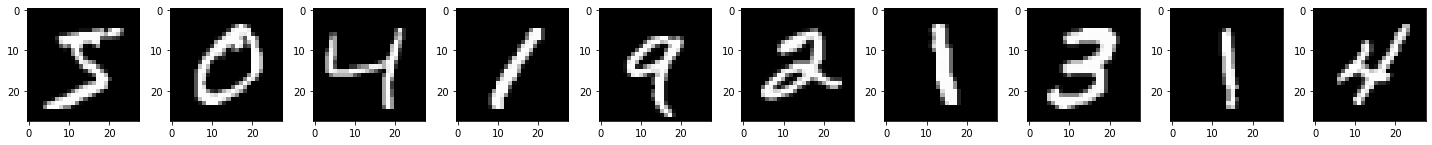

In [26]:
# visualisation de quelques images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(x[i], cmap='gray')

plt.tight_layout()
plt.show()

In [27]:
print("train")
print(x.shape)
# import numpy as np
# arr=np.array([[1,1,1],[1,1,1]])
# arr.shape
print(len(x))
print(y.shape)
print(len(y))
print("test")
print(X.shape)
print(len(X))
print(Y.shape)
print(len(Y))

train
(60000, 28, 28)
60000
(60000,)
60000
test
(10000, 28, 28)
10000
(10000,)
10000


In [28]:
#reshaping x into 60000 lines of vectors with 28x28=784 column
x=x.reshape(60000,784).astype('float32')
X=X.reshape(10000,784).astype('float32')
#rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.
x=x/255.0
X=X/255.0
y=keras.utils.to_categorical(y,10)
Y=keras.utils.to_categorical(Y,10)

In [29]:
print("train")
print(x.shape)
print(y.shape)
print("test")
print(X.shape)
print(Y.shape)

train
(60000, 784)
(60000, 10)
test
(10000, 784)
(10000, 10)


In [30]:
from keras.models import Sequential
from keras.layers import Dense 

In [31]:
model=Sequential()
model.add(Dense(64,input_shape=(784,),activation='relu'))
model.add(Dense(10,activation='softmax')) #output the probability
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x,y,epochs=10,batch_size=128,validation_data=(X,Y))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4237 - acc: 0.8842 - val_loss: 0.2418 - val_acc: 0.9315
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2134 - acc: 0.9399 - val_loss: 0.1784 - val_acc: 0.9494
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1623 - acc: 0.9541 - val_loss: 0.1457 - val_acc: 0.9582
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1313 - acc: 0.9633 - val_loss: 0.1271 - val_acc: 0.9639
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1097 - acc: 0.9694 - val_loss: 0.1202 - val_acc: 0.9658
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0948 - acc: 0.9732 - val_loss: 0.1070 - val_acc: 0.9681
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0829 - acc: 0.9762 - val_loss: 0.0978 - val_acc: 0.9700
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.

In [33]:
# Evaluation du modele
test_loss, test_acc = model.evaluate(X,  Y)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0870 - acc: 0.9727
Test accuracy: 0.9726999998092651


In [34]:
# modele prédictif (softmax)
import numpy as np
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X)
predictions = np.argmax(predict_proba, axis=1)

print(predictions[:10])
print(Y[:10])

313/313 [==============================] - 1s 2ms/step
[7 2 1 0 4 1 4 9 6 9]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
